In [610]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

import numpy as np
import random

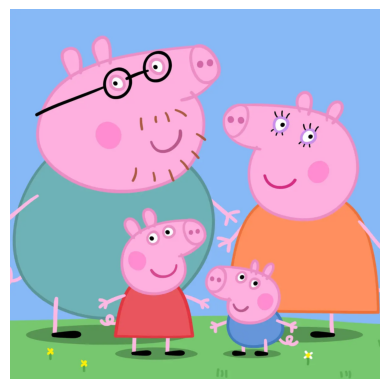

In [611]:
src = cv2.imread('peppa_pig_2.png')
img = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

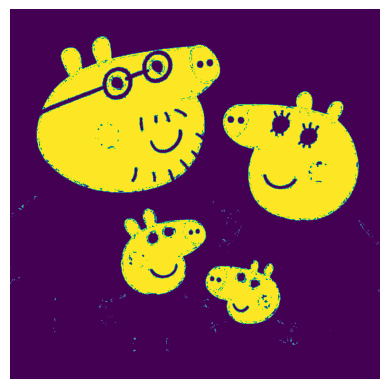

In [612]:
lower = np.array([230, 140, 190])
higher = np.array([255, 180, 230])
mask = cv2.inRange(img, lower, higher)
plt.axis('off')
plt.imshow(mask)

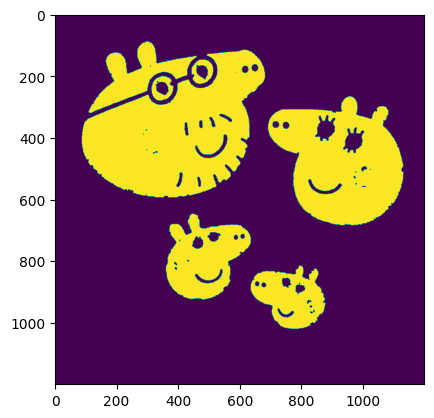

In [613]:
blurred_img = cv2.medianBlur(mask, 5)

kernel = np.ones((5, 5),np.uint8)
erosion = cv2.erode(blurred_img, kernel, iterations=1)
dilated = cv2.dilate(erosion, kernel, iterations=1)

plt.imshow(dilated)
plt.show()

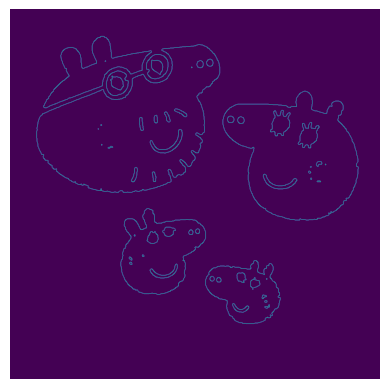

In [614]:
# Преобразуем в ЧБ
# gray = cv2.cvtColor(dilated, cv2.COLOR_BGR2GRAY)
gray = dilated.copy()
plt.axis('off')
plt.imshow(gray, cmap='gray')
# plt.show()
# Определение границ оператором Кэнни
canny = cv2.Canny(gray, 0, 250, L2gradient = True)
plt.axis('off')
plt.imshow(canny)

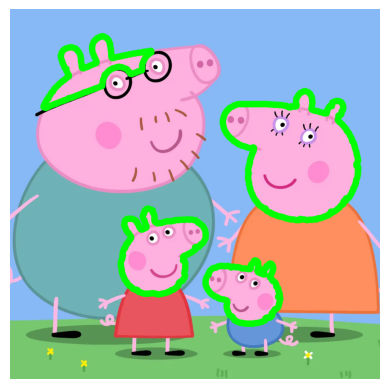

In [615]:
contours = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
final = img.copy()
for cont in contours:
    if len(cont) > 200:
        #поиск периметра и определение количества углов
        sm = cv2.arcLength(cont, True)
        apd = cv2.approxPolyDP(cont, 0.01*sm, True)
        if 16 <= len(apd) <= 25:
            cv2.drawContours(final, [cont], -1, (0,255,0), 20)
plt.axis('off')
plt.imshow(final)
plt.show()